<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 8: Dimensionality Reduction
Dimensionality reduction adalah teknik untuk mengurangi jumlah fitur (dimensi) dalam dataset sambil mempertahankan informasi penting sebanyak mungkin. Teknik ini sangat berguna untuk mengatasi "curse of dimensionality" yang terjadi ketika jumlah fitur sangat besar dibandingkan dengan jumlah sampel data.

##1. Mengapa Dimensionality Reduction Penting?

- Curse of Dimensionality: Semakin tinggi dimensi data, semakin sparse data tersebut dalam ruang fitur, yang membuat algoritma machine learning kurang efektif
- Visualisasi Data: Memungkinkan visualisasi data high-dimensional dalam 2D atau 3D
- Efisiensi Komputasi: Mengurangi waktu training dan prediksi
- Storage: Mengurangi kebutuhan penyimpanan data
- Noise Reduction: Menghilangkan fitur yang tidak relevan atau noisy

##2. Pendekatan Utama

- Projection: Memproyeksikan data ke subspace dengan dimensi lebih rendah
- Manifold Learning: Mencari manifold berdimensi rendah yang merepresentasikan data

##3. Principal Component Analysis (PCA)
PCA adalah teknik dimensionality reduction yang paling populer. PCA mengidentifikasi sumbu (principal components) yang memaksimalkan variance dalam data.

###Cara Kerja PCA:

- Standardisasi Data: Pastikan semua fitur memiliki skala yang sama
- Hitung Covariance Matrix: Menghitung hubungan antar fitur
- Eigenvalue Decomposition: Mencari eigenvector dan eigenvalue
- Pilih Principal Components: Urutkan berdasarkan eigenvalue terbesar
- Transform Data: Proyeksikan data ke ruang principal components

###Keuntungan PCA:

- Linear transformation yang efisien
- Mempertahankan variance maksimal
- Menghilangkan korelasi antar fitur (orthogonal components)

###Kekurangan PCA:

- Hanya menangkap hubungan linear
- Sulit diinterpretasi
- Sensitive terhadap scaling

##4. Kernel PCA
Kernel PCA adalah ekstensi dari PCA yang dapat menangkap hubungan non-linear menggunakan kernel trick. Teknik ini memungkinkan PCA bekerja dalam ruang fitur berdimensi tinggi tanpa secara eksplisit menghitung transformasi.

###Jenis Kernel yang Umum:

- Linear Kernel: Sama dengan PCA biasa
- Polynomial Kernel: Menangkap interaksi polynomial
- RBF (Gaussian) Kernel: Menangkap hubungan non-linear kompleks
- Sigmoid Kernel: Mirip dengan neural network activation

##5. Locally Linear Embedding (LLE)
LLE adalah teknik manifold learning yang mempertahankan hubungan lokal antar data points. LLE bekerja dengan asumsi bahwa setiap data point dapat direkonstruksi sebagai kombinasi linear dari tetangganya.

###Langkah-langkah LLE:

- Cari k-nearest neighbors untuk setiap data point
- Hitung bobot rekonstruksi yang meminimalkan error rekonstruksi
- Cari embedding yang mempertahankan bobot rekonstruksi

###Keuntungan LLE:

- Menangkap struktur non-linear lokal
- Komputasi relatif efisien
- Tidak memerlukan parameter kernel

#Implimentasi Kode
##1. PCA Dasar

=== PCA Dasar ===


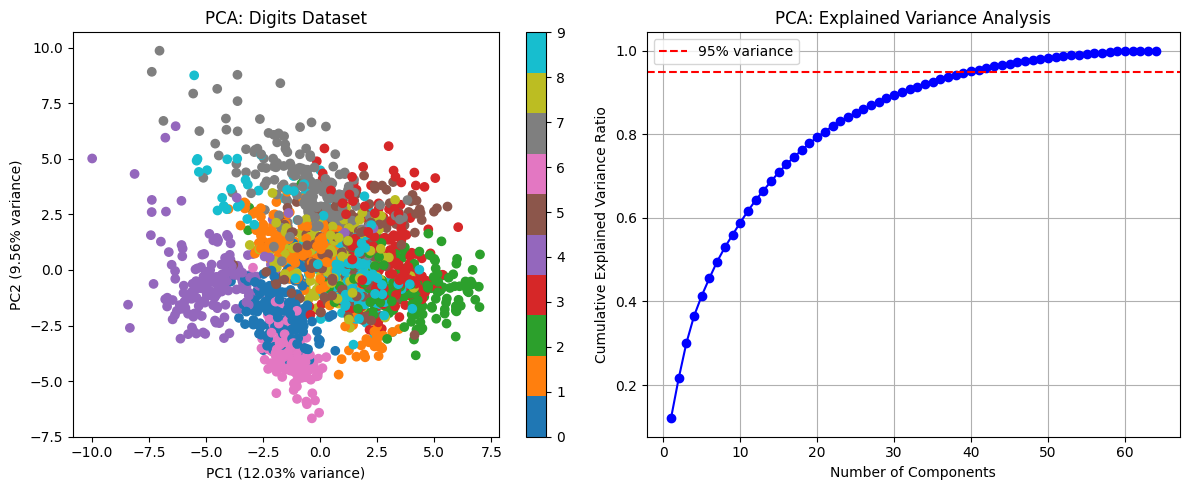

Jumlah komponen untuk 95% variance: 40
Total variance dijelaskan oleh 2 komponen pertama: 21.59%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 1. CONTOH PCA DASAR
print("=== PCA Dasar ===")

# Load dataset digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Standardisasi data
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Aplikasi PCA
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y_digits, cmap='tab10')
plt.title('PCA: Digits Dataset')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar()

# Analisis explained variance
pca_full = PCA()
pca_full.fit(X_digits_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Analysis')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()

plt.tight_layout()
plt.show()

# Cari jumlah komponen untuk 95% variance
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"Jumlah komponen untuk 95% variance: {n_components_95}")
print(f"Total variance dijelaskan oleh 2 komponen pertama: {sum(pca.explained_variance_ratio_):.2%}")

##2. Kernel PCA


=== Kernel PCA ===


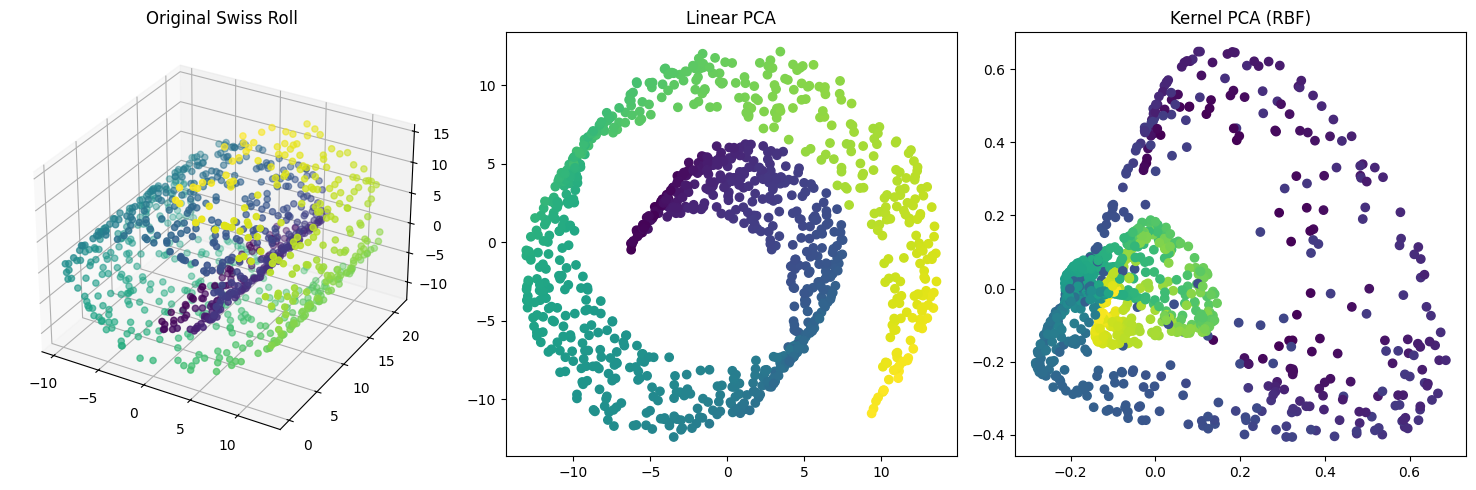

In [3]:
# 2. CONTOH KERNEL PCA
print("\n=== Kernel PCA ===")

# Generate Swiss Roll dataset
X_swiss, color_swiss = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Bandingkan PCA biasa vs Kernel PCA
fig = plt.figure(figsize=(15, 5))

# Original 3D data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color_swiss, cmap='viridis')
ax1.set_title('Original Swiss Roll')

# PCA biasa
pca_linear = PCA(n_components=2)
X_pca_linear = pca_linear.fit_transform(X_swiss)

ax2 = fig.add_subplot(132)
ax2.scatter(X_pca_linear[:, 0], X_pca_linear[:, 1], c=color_swiss, cmap='viridis')
ax2.set_title('Linear PCA')

# Kernel PCA dengan RBF kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_kpca_rbf = kpca_rbf.fit_transform(X_swiss)

ax3 = fig.add_subplot(133)
ax3.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=color_swiss, cmap='viridis')
ax3.set_title('Kernel PCA (RBF)')

plt.tight_layout()
plt.show()

##3. Optimasi Kernel PCA dengan Grid Search

In [4]:
# 3. OPTIMASI KERNEL PCA DENGAN GRID SEARCH
print("\n=== Optimasi Kernel PCA ===")

# Buat pipeline untuk optimasi
pipe = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(max_iter=1000))
])

# Parameter grid untuk berbagai kernel
param_grid = [
    {
        'kpca__kernel': ['linear'],
        'kpca__n_components': [2, 5, 10]
    },
    {
        'kpca__kernel': ['rbf'],
        'kpca__gamma': [0.01, 0.03, 0.1, 0.3],
        'kpca__n_components': [2, 5, 10]
    },
    {
        'kpca__kernel': ['poly'],
        'kpca__degree': [2, 3, 4],
        'kpca__n_components': [2, 5, 10]
    }
]

# Grid search dengan cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_digits_scaled, y_digits)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")


=== Optimasi Kernel PCA ===
Best parameters: {'kpca__gamma': 0.03, 'kpca__kernel': 'rbf', 'kpca__n_components': 10}
Best cross-validation score: 0.848


##4. Locally Linear Embedding (LLE)


=== Locally Linear Embedding ===


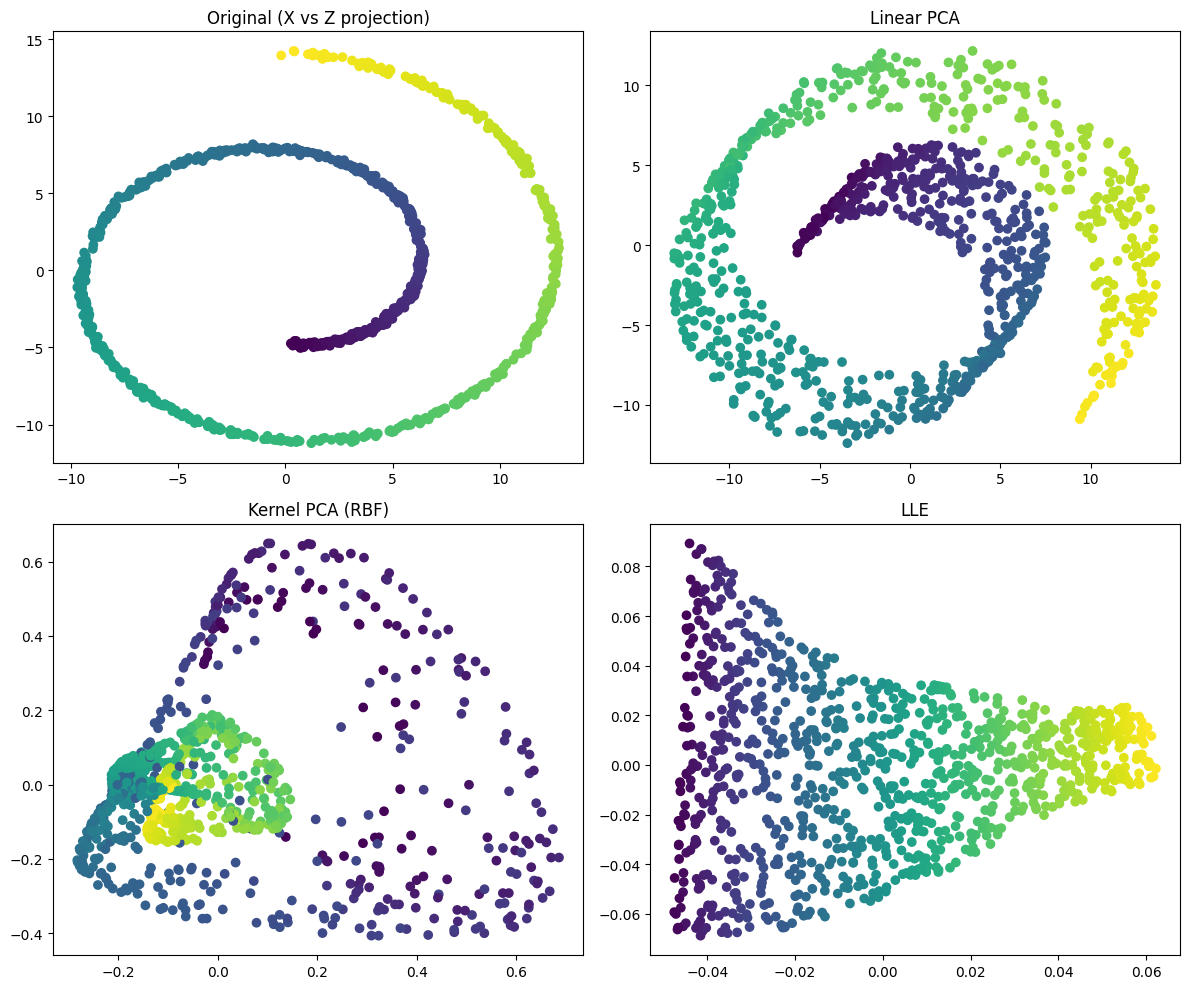

In [5]:
# 4. LOCALLY LINEAR EMBEDDING (LLE)
print("\n=== Locally Linear Embedding ===")

# Aplikasi LLE pada Swiss Roll
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_swiss)

# Bandingkan PCA, Kernel PCA, dan LLE
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original data (proyeksi 2D sederhana)
axes[0, 0].scatter(X_swiss[:, 0], X_swiss[:, 2], c=color_swiss, cmap='viridis')
axes[0, 0].set_title('Original (X vs Z projection)')

# Linear PCA
axes[0, 1].scatter(X_pca_linear[:, 0], X_pca_linear[:, 1], c=color_swiss, cmap='viridis')
axes[0, 1].set_title('Linear PCA')

# Kernel PCA
axes[1, 0].scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=color_swiss, cmap='viridis')
axes[1, 0].set_title('Kernel PCA (RBF)')

# LLE
axes[1, 1].scatter(X_lle[:, 0], X_lle[:, 1], c=color_swiss, cmap='viridis')
axes[1, 1].set_title('LLE')

plt.tight_layout()
plt.show()



##5. Perbandingan Performa Berbagai Teknik


=== Perbandingan Performa ===
Hasil Perbandingan Akurasi:
Full Features  : 0.9722
PCA            : 0.9639
Kernel PCA     : 0.8806
LLE            : 0.6444


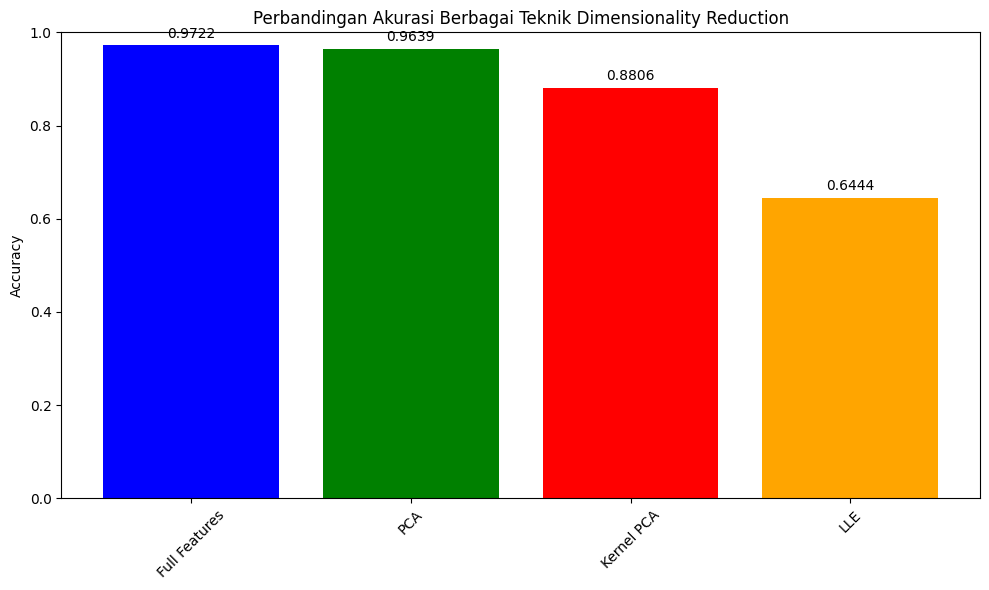

In [6]:
# 5. PERBANDINGAN PERFORMA BERBAGAI TEKNIK
print("\n=== Perbandingan Performa ===")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_digits_scaled, y_digits, test_size=0.2, random_state=42
)

# Dictionary untuk menyimpan hasil
results = {}

# 1. Tanpa dimensionality reduction
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train, y_train)
y_pred_full = log_reg_full.predict(X_test)
results['Full Features'] = accuracy_score(y_test, y_pred_full)

# 2. PCA
pca_opt = PCA(n_components=n_components_95)
X_train_pca = pca_opt.fit_transform(X_train)
X_test_pca = pca_opt.transform(X_test)

log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
results['PCA'] = accuracy_score(y_test, y_pred_pca)

# 3. Kernel PCA (menggunakan best params dari grid search)
best_kpca = KernelPCA(**{k.replace('kpca__', ''): v for k, v in grid_search.best_params_.items()
                         if k.startswith('kpca__')})
X_train_kpca = best_kpca.fit_transform(X_train)
X_test_kpca = best_kpca.transform(X_test)

log_reg_kpca = LogisticRegression(max_iter=1000)
log_reg_kpca.fit(X_train_kpca, y_train)
y_pred_kpca = log_reg_kpca.predict(X_test_kpca)
results['Kernel PCA'] = accuracy_score(y_test, y_pred_kpca)

# 4. LLE
lle_digits = LocallyLinearEmbedding(n_components=10, n_neighbors=10, random_state=42)
X_train_lle = lle_digits.fit_transform(X_train)
X_test_lle = lle_digits.transform(X_test)

log_reg_lle = LogisticRegression(max_iter=1000)
log_reg_lle.fit(X_train_lle, y_train)
y_pred_lle = log_reg_lle.predict(X_test_lle)
results['LLE'] = accuracy_score(y_test, y_pred_lle)

# Tampilkan hasil
print("Hasil Perbandingan Akurasi:")
for method, accuracy in results.items():
    print(f"{method:15}: {accuracy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
methods = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(methods, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Perbandingan Akurasi Berbagai Teknik Dimensionality Reduction')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##6. Analisis Komponen Utama


=== Analisis Komponen Utama ===


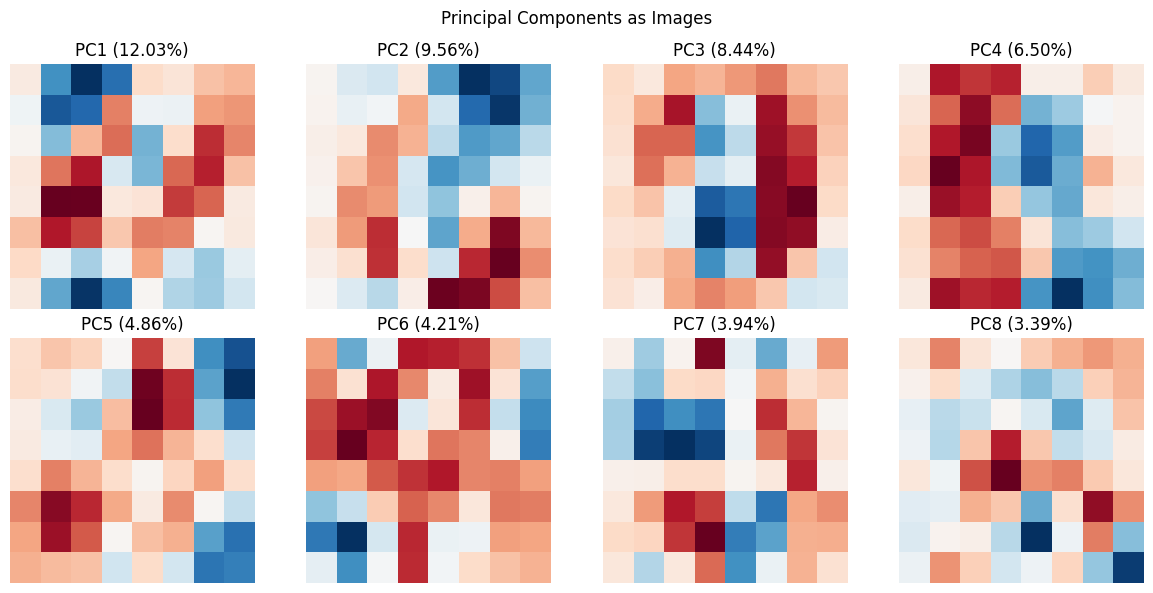

In [7]:
# 6. ANALISIS KOMPONEN UTAMA
print("\n=== Analisis Komponen Utama ===")

# Visualisasi komponen utama sebagai gambar (untuk digits)
pca_viz = PCA(n_components=8)
pca_viz.fit(X_digits_scaled)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Reshape komponen kembali ke bentuk gambar 8x8
    component_image = pca_viz.components_[i].reshape(8, 8)
    ax.imshow(component_image, cmap='RdBu')
    ax.set_title(f'PC{i+1} ({pca_viz.explained_variance_ratio_[i]:.2%})')
    ax.axis('off')

plt.suptitle('Principal Components as Images')
plt.tight_layout()
plt.show()